In [9]:
from pycaret.regression import *

import pandas as pd
import numpy as np

df = pd.read_csv(r'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/1980%202023%20average%20house%20prices.csv')

df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m')
df = df[['Period', 'Average price All property types']]
df

,Period,Average price All property types
0,1980-01-01,19273
1,1980-02-01,19273
2,1980-03-01,19273
3,1980-04-01,20044
4,1980-05-01,20044
...,...,...
518,2023-03-01,282548
519,2023-04-01,283871
520,2023-05-01,285053
521,2023-06-01,288281


In [10]:
model_data = df[df['Period'] < pd.to_datetime('2011', format='%Y')]
real_future_data = df[df['Period'] >= pd.to_datetime('2011', format='%Y')]

In [11]:
S = setup(data=model_data,
          train_size=0.7,
          target='Average price All property types',
          date_features=['Period'],
          fold=2,
          fold_shuffle=False,
          fold_strategy='timeseries',
          data_split_shuffle=False,
          session_id=123
        )

,Description,Value
0,Session id,123
1,Target,Average price All property types
2,Target type,Regression
3,Original data shape,"(372, 2)"
4,Transformed data shape,"(372, 4)"
5,Transformed train set shape,"(260, 4)"
6,Transformed test set shape,"(112, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,10309.2497,130510463.9036,11264.1056,-1.8243,0.2065,0.1751,0.0250
lar,Least Angle Regression,10309.2497,130510463.9036,11264.1056,-1.8243,0.2065,0.1751,0.0150
lasso,Lasso Regression,10309.9825,130527513.1231,11264.7089,-1.8249,0.2065,0.1751,0.0250
llar,Lasso Least Angle Regression,10309.9826,130527516.1515,11264.7091,-1.8249,0.2065,0.1751,0.0200
br,Bayesian Ridge,10311.0104,130555231.1634,11261.8642,-1.8319,0.2065,0.1751,0.0200
ridge,Ridge Regression,10327.6284,130933687.1205,11279.3761,-1.8382,0.2069,0.1754,0.0200
omp,Orthogonal Matching Pursuit,10374.2596,133155073.9248,11356.9876,-1.9141,0.2088,0.1763,0.0200
en,Elastic Net,10959.4291,146993411.3368,11788.3608,-2.4117,0.2204,0.1867,0.0250
gbr,Gradient Boosting Regressor,15996.2880,372431731.2923,19210.8569,-4.6455,0.3378,0.2424,0.0450
par,Passive Aggressive Regressor,16069.8691,370755615.7734,19251.3712,-5.3183,0.3450,0.2476,0.0200


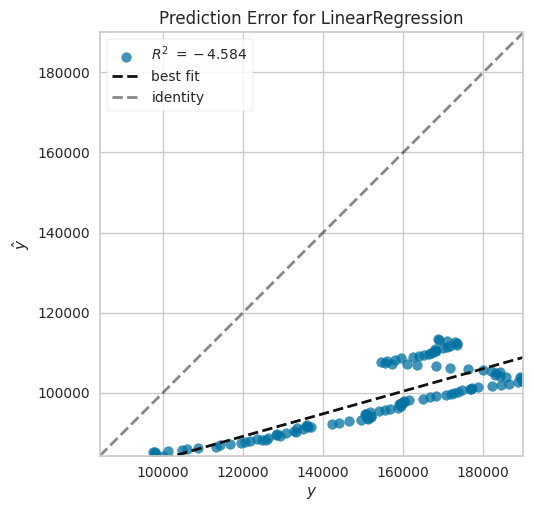

In [13]:
plot_model(best, plot='error')

In [14]:
future_dates=pd.date_range(start='2011-01-01', end='2030-01-01', freq='MS')

future_df = pd.DataFrame()
future_df['Period'] = future_dates

predictions_future = predict_model(best, data=future_df)

predictions_future

,Period,prediction_label
0,2011-01-01,113411.748080
1,2011-02-01,113703.637467
2,2011-03-01,113995.526854
3,2011-04-01,114287.416242
4,2011-05-01,114579.305629
...,...,...
224,2029-09-01,172376.448379
225,2029-10-01,172668.337766
226,2029-11-01,172960.227153
227,2029-12-01,173252.116541


In [15]:
import plotly.express as px

concat_df = pd.concat([model_data, predictions_future], axis=0)

fig = px.line(concat_df, x=concat_df['Period'], y=['Average price All property types', 'prediction_label'])
fig.add_scatter(x=df['Period'], y=df['Average price All property types'])

In [17]:
final_val = model_data['Average price All property types'].iloc[-1]
first_val = predictions_future['prediction_label'].iloc[0]
 
predictions_future['corrected val'] = predictions_future['prediction_label'] - first_val + final_val
 
concat_df = pd.concat([model_data, predictions_future], axis=0)
 
fig = px.line(concat_df, x=concat_df['Period'], y=['Average price All property types', 'corrected val'])
fig.add_scatter(x=df['Period'], y=df['Average price All property types'])
 
fig.show()